In [1]:
import pandas as pd
from numpy import unique, mean, quantile, array
import seaborn as sns
from numpy.random import choice, seed

seed(1234)

In [2]:
details = {}

details[0] = {
  "treatment": "A",
  "size": "small",
  "patients_n": 87,
  "recovered_n": 81
}
details[1] = {
  "treatment":"A",
  "size": "large",
  "patients_n": 263,
  "recovered_n": 192
}
details[2] = {
  "treatment":"B",
  "size": "small",
  "patients_n": 270,
  "recovered_n": 234
}
details[3] = {
  "treatment":"B",
  "size": "large",
  "patients_n": 80,
  "recovered_n": 50
}  

In [3]:
def adjustment(t, o, z, t0):
    ind_t0 = t == t0
    z_values = unique(z)

    adjusted_prob = 0
    for z_ in z_values:
        ind_z_ = z == z_
        ind = ind_t0 & ind_z_
        adjusted_prob = adjusted_prob + mean(o[ind])*mean(ind_z_)
    return(adjusted_prob)

In [4]:
treatments = []
sizes = []
recovered = []

for i in range(4):
    treatments += [details[i]["treatment"]]*details[i]["patients_n"]
    sizes += [details[i]["size"]]*details[i]["patients_n"]
    recovered_ = [0]*details[i]["patients_n"]
    for j in range(details[i]["recovered_n"]):
        recovered_[j] = 1
    recovered += recovered_

df = pd.DataFrame({
    "treatment": treatments,
    "size": sizes,
    "recovered": recovered
})

In [5]:
adjustment(df['treatment'], df['recovered'], df['size'], 'A')
adjustment(df['treatment'], df['recovered'], df['size'], 'B')

0.7482500000000001

In [6]:
bootstrap_n = 1000
ates = []
for i in range(bootstrap_n):
    df_resample = df.sample(frac=1, replace=True)
    do_t_A = adjustment(
        df_resample['treatment'], df_resample['recovered'], df_resample['size'], 'A'
    )
    do_t_B = adjustment(
        df_resample['treatment'], df_resample['recovered'], df_resample['size'], 'B'
    )
    ates.append(do_t_A - do_t_B)

<AxesSubplot: ylabel='Count'>

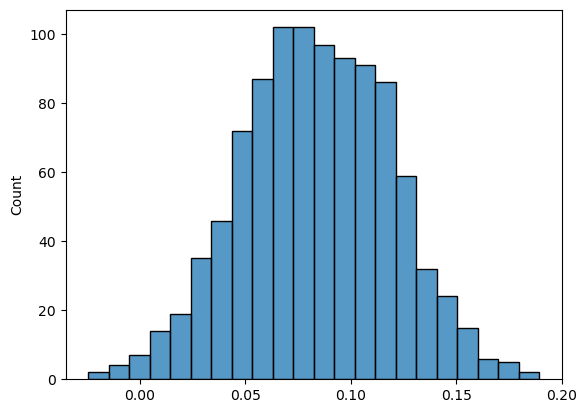

In [7]:
sns.histplot(ates)

In [8]:
mean(array(ates) > 0)

0.992

In [9]:
quantile(ates, q=[0, 0.25, 0.5, 0.75, 1])


array([-0.0243747 ,  0.0590232 ,  0.08360866,  0.10900581,  0.18934418])